# Support Vector Regression (SVR) with Linear, Polynomial, and RBF Kernels
_A tutorial using the California Housing dataset_

Author: Shrey Nayak

---

## Objectives
- Understand the concept of **Support Vector Regression (SVR)**.
- Learn the differences between **Linear**, **Polynomial**, and **RBF** kernels.
- Implement SVR models in scikit-learn.
- Compare model performance.
- Perform hyperparameter tuning.


## 1. Introduction to Support Vector Regression (SVR)

**Support Vector Regression (SVR)** is an extension of Support Vector Machines (SVM) for regression tasks.  
Instead of finding a decision boundary (as in classification), SVR tries to find a function that approximates the target values within a certain margin of tolerance **ε (epsilon)**.

---

### Key Concepts:
1. **Margin of Tolerance (ε)**  
   - Predictions within ±ε of the true value are considered correct (no penalty).

2. **Support Vectors**  
   - Data points lying outside the ε-tube (margin) influence the regression function.

3. **Regularization Parameter (C)**  
   - Controls the trade-off between margin width and training error.  
   - High C → smaller margin, lower bias, higher variance.  
   - Low C → larger margin, higher bias, lower variance.

4. **Kernels**  
   - Transform data into higher-dimensional space to capture complex patterns.
   - **Linear Kernel**: Assumes linear relationship.  
   - **Polynomial Kernel**: Captures polynomial relationships.  
   - **RBF Kernel**: Captures non-linear relationships using Gaussian functions.

---

## 2. SVR Kernels in Brief

| Kernel     | Formula                  | Use Case                      |
|------------|--------------------------|------------------------------|
| Linear     | $$K(x, x') = x \cdot x'$$ | Data is linearly related      |
| Polynomial | $$K(x, x') = (\gamma x \cdot x' + r)^d$$ | Polynomial relationships      |
| RBF        | $$K(x, x') = \exp(-\gamma \|x - x'\|^2)$$ | Complex, smooth nonlinear patterns |


## 3. `SVR` in scikit-learn

Key parameters:
- `kernel`: `'linear'`, `'poly'`, `'rbf'`, etc.
- `C`: Regularization parameter.
- `epsilon`: Width of ε-tube.
- `degree`: Degree of polynomial kernel.
- `gamma`: Kernel coefficient for 'rbf' and 'poly'.

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load California Housing dataset
california = fetch_california_housing(as_frame=True)
df = california.frame

# Show first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset shape: (20640, 9)

Summary statistics:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532 

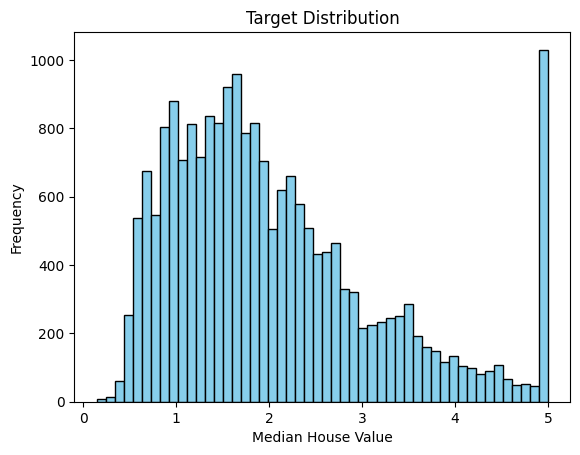

In [3]:
print("Dataset shape:", df.shape)
print("\nSummary statistics:\n", df.describe())
print("\nMissing values:\n", df.isnull().sum())

# Target distribution
plt.hist(df['MedHouseVal'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Target Distribution")
plt.show()


In [4]:
# Features & target
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization (Required for SVR to work well)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Linear SVR
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_train_scaled, y_train)
y_pred_linear = svr_linear.predict(X_test_scaled)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear SVR -> RMSE: {rmse_linear:.3f}, R²: {r2_linear:.3f}")


Linear SVR -> RMSE: 0.761, R²: 0.558


In [6]:
# Polynomial SVR
svr_poly = SVR(kernel='poly', C=1.0, epsilon=0.1, degree=3, gamma='scale')
svr_poly.fit(X_train_scaled, y_train)
y_pred_poly = svr_poly.predict(X_test_scaled)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial SVR -> RMSE: {rmse_poly:.3f}, R²: {r2_poly:.3f}")


Polynomial SVR -> RMSE: 1.002, R²: 0.233


In [7]:
# RBF SVR
svr_rbf = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma='scale')
svr_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svr_rbf.predict(X_test_scaled)

rmse_rbf = np.sqrt(mean_squared_error(y_test, y_pred_rbf))
r2_rbf = r2_score(y_test, y_pred_rbf)

print(f"RBF SVR -> RMSE: {rmse_rbf:.3f}, R²: {r2_rbf:.3f}")


RBF SVR -> RMSE: 0.569, R²: 0.753


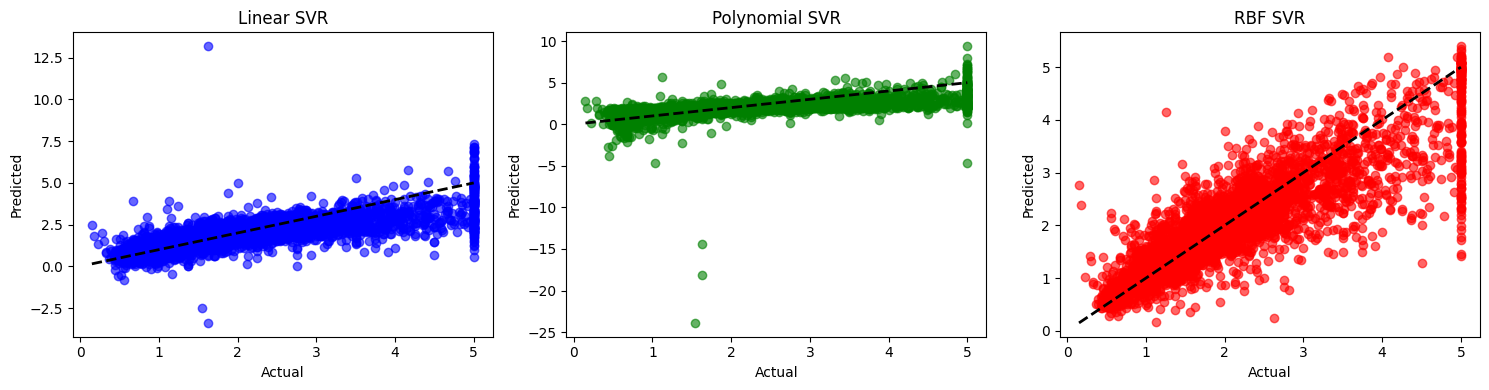

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))

# Linear SVR
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear SVR')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Polynomial SVR
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Polynomial SVR')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# RBF SVR
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rbf, color='red', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('RBF SVR')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


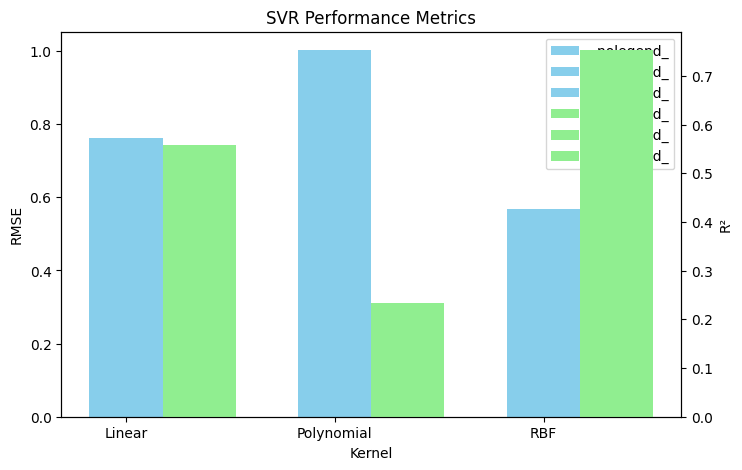

In [11]:
fig, ax1 = plt.subplots(figsize=(8,5))

kernels = results['Kernel']
rmse = results['RMSE']
r2 = results['R²']

bar_width = 0.35
index = np.arange(len(kernels))

# RMSE bars
bars1 = ax1.bar(index, rmse, bar_width, label='RMSE', color='skyblue')
ax1.set_xlabel('Kernel')
ax1.set_ylabel('RMSE')
ax1.set_xticks(index)
ax1.set_xticklabels(kernels)
ax1.set_title('SVR Performance Metrics')

# R² on secondary y-axis
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, r2, bar_width, label='R²', color='lightgreen')
ax2.set_ylabel('R²')

# Add legend
bars = bars1 + bars2
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper right')

plt.show()

In [8]:
# Compare results
results = pd.DataFrame({
    'Kernel': ['Linear', 'Polynomial', 'RBF'],
    'RMSE': [rmse_linear, rmse_poly, rmse_rbf],
    'R²': [r2_linear, r2_poly, r2_rbf]
})
results


,Kernel,RMSE,R²
0,Linear,0.761099,0.557946
1,Polynomial,1.002398,0.233216
2,RBF,0.568960,0.752966


In [9]:
# Parameter grid for RBF SVR
param_grid = {
    'C': [1, 10, 50],
    'epsilon': [0.05, 0.1, 0.2],
    'gamma': ['scale', 0.1, 0.01]
}

grid_search = GridSearchCV(
    SVR(kernel='rbf'),
    param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)


Best Parameters: {'C': 50, 'epsilon': 0.2, 'gamma': 'scale'}
Best CV R²: 0.7612258572558405


## Conclusion

- SVR is a powerful regression technique that works well with properly scaled data.
- **Linear kernel**: Best for linearly related features.
- **Polynomial kernel**: Captures polynomial relationships but may overfit.
- **RBF kernel**: Most flexible, often best for complex patterns.
- Hyperparameter tuning (C, epsilon, gamma) is crucial for good performance.

**Advantages:**
- Works well in high-dimensional spaces.
- Flexibility with kernels.
- Robust to overfitting (with proper parameters).

**Limitations:**
- Training time increases with dataset size.
- Requires careful scaling of features.
- Sensitive to choice of kernel parameters.

**Next Steps:**
- Test SVR on smaller subsets for faster experimentation.
- Compare with tree-based methods like Random Forest or Gradient Boosting.
